<a href="https://colab.research.google.com/github/LuizPitaAlmeida/GUIA_PDI_PYTHON_ALPR/blob/master/executable_papers/Image_Captioning_Reproducible_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image captioning using Convolutional Neural Networks and moderns Natural Language models

Luiz Eduardo Pita Mercês Almeida - l229078@g.unicamp.br

Executable form of the paper [Image captioning using Convolutional Neural Networks and moderns Natural Language models](https://github.com/LuizPitaAlmeida/image_caption_generator/blob/master/Image_Captioning.pdf).

- To simple run, go to Runtime Menu and click Run All or simple press Control+F9.
- To edit, please, create a copy to your drive.

![show_and_tell_model](https://github.com/LuizPitaAlmeida/image_caption_generator/blob/master/figures/show_and_tell_img_introduction.png?raw=true)

<font size="2"> <center> *Vinyals et al - Show and Tell: A Neural Image Caption Generator (2015) [1].*  </center> </font>

## Abstract

---
On the last decade, deep learning techniques archived many state of art results in computer research areas such as Computer Vision. Nowadays, we are experimenting a revolution in Natural Language Processing field. One task that join Computer Vision and NLP is the image captioning task. This task , using a deep learning approach, consists of extract deep representations of images using a Convolutional Neural Network model, associated them with a embedding representation of caption words in a language generator model. This paper purposes an algorithm based on a encoder-decoder architecture to predict new captions for an image. This model uses a ResNet101 CNN to extract features from image, a BERT model to generate word embedding, and a LSTM layer as text generator. Also, we included a Soft Attention mechanism to calculate the relationship between each predicted word and a portion of the respective image. To measure our results we used the BLEU metric, a common metric used for the chosen dataset, Coco Captions dataset. This paper source code can be find in GitHub.

Repository GitHub: https://github.com/LuizPitaAlmeida/image_caption_generator


In [1]:
!git clone --quiet https://github.com/LuizPitaAlmeida/image_caption_generator
!cd image_caption_generator && git pull

Already up to date.


## Introduction
---
With the emergence of deep learning, specially the advent of Convolutional Neural Networks (CNN) and Recurrent Neural Networks (RNN), the image captioning area, like many other subjects of Computer Vision, achieved new state of art results. The image captioning is an automatic way to describe an image, generating a caption for the scene. It can help in many applications, such as image retrieval. The image captioning incorporate many areas of Computer Vision, such as object detection, object recognition, scene understanding, object properties and their interactions. All of these are necessary to make a machine understand an image, but it also necessary to make a machine learn how to generate a sentence[2].

Another research area that got an upgrade with the advances on deep learning is the Natural Language Processing (NLP). This area gotten better results with the use of neural models, followed by the use of RNN, such as LSTM (Long Short Term Memory) and GRU (Gated Recurrent Unit). Nowadays, the state of arts results are focus on the use of attention mechanisms, mainly with the advent of Transform models[3]. Pre-trained Transform models like BERT (Bidirectional Encoder Representations from Transformers)[4] and T5[5] are the most modern state of art methods in NLP.

In general, image caption models follow a encoder-decoder architecture, where the encoder is an image feature extractor, mostly a CNN. This image encoder can be associated to a language model encoder to generate a jointly embedded representation of words and images. This association forms the multi-modal language models. On the other hand, the decoder is a text generator model, mainly using LSTM language models, that translate the embedding from encoders into a sentence. This approach is mainly trained using a supervised method. Others approaches include the usage of reinforcement learning, unsupervised learning, attention mechanisms, semantic concepts, additional code blocks that check the quality of the text generated, generative adversarial networks, and others [2].
 
This paper focus in implement a image caption generator demonstration that follows a encoder-decoder architecture. The encoder is a CNN model only to extract images features, so it is not a multi-modal encoder. The decoder uses a modern NLP pre-trained model, the BERT, to generate word embedding, and a LSTM network to generate captions. 


## Related works
---
The first famous paper using Deep Learning in image captioning was the Show and Tell (2015) paper [1]. The authors of this paper proposed an encoder-decoder approach for the task basing in the advances in machine translation algorithms. Instead of use a RNN encoder, they propose to use an CNN to extract deep features from the images. In the time of the paper, CNN approach were hype algorithms for image processing tasks. The final model proposed had a CNN encoder and RNN decoder, as shown in Fig.1.

<center> Figure 1 - Show and Tell Model. </center>

![show_and_tell_model](https://github.com/LuizPitaAlmeida/image_caption_generator/blob/master/figures/show_and_tell_model.png?raw=true)

<font size="2"> <center> *Vinyals et al - Show and Tell: A Neural Image Caption Generator (2015) [1].*  </center> </font>

A second paper that based our implementation was the Show, Attend and Tell (2015) paper [6]. This paper was published near the publication of Show and Tell (2015) paper. It uses the same idea of Show and Tell, but change the RNN decoder for a LSTM decoder, and add the concept of Attention Mechanism for images. The main contribution of the paper were the two attention mechanisms proposed. The first one, used in our paper, was the Soft Attention that uses linear layers to determine in a deterministic way what region of the image embedding the decoder needs to look to predict a correlated word. The second one is the Hard Attention, that combines supervised approach with a reinforcement learning approach creating an stochastic attention mechanism for images. Fig.2 and Fig.3 illustrate the proposed model and how the attention mechanism acts on images.

<center> Figure 2 - Show, Attend and Tell Model. </center>

![show_attend_and_tell_model](https://github.com/LuizPitaAlmeida/image_caption_generator/blob/master/figures/show_attend_tell_model.png?raw=true)
<font size="2"> <center> *Xu et al - Show, Attend and Tell: Neural Image Caption Generation with Visual Attention (2015) [6].*  </center> </font>

</br>

<center> Figure 3 - Show, Attend and Tell Attention Mechanism. </center>

![show_attend_and_tell_attention](https://github.com/LuizPitaAlmeida/image_caption_generator/blob/master/figures/show_attend_tell_attention.png?raw=true)

<font size="2"> <center> *Xu et al - Show, Attend and Tell: Neural Image Caption Generation with Visual Attention (2015)  [6].*  </center> </font>

Also, we proposed to add BERT transformer model to Show, Attend and Tell implementation. BERT is recent paper published by Google AI team in 2019 that, in the last year, got state-of-art results in a wide range of NLP tasks. It is designed using only attention mechanism, i.e., a Transformer module [3], and considering a bidirectional context.

Transformers models are multi-head attention models formed by an attention encoder and an attention decoder. An attention encoder layer for NLP tasks does linear combinations of the input tokens embedding predicting a probability for each one of those combinations. The BERT is a Transformer encoder that does a bidirectional context combination trying to use both past and future context to predict a word [4].

Bert was trained to be a language model that understand better the language context and flow. Researches notice that BERT could be distribute as a pre-trained model such as pre-trained CNNs, so common in Computer Vision area. In our approach we used BERT only to generate embedding for the LSTM language model.

The modern approaches for image captioning consists of create a single model that can handle with image and text features as a multi-modal feature extractor to predict text outputs. In some case the input are only images. These novel approaches are named as Visual-Linguistics representation models. Most of them combines transformers architectures with CNN for feature extraction, classification task and object detection [7, 8, 9, 10, 11].


## Materials and Methods

---

In this section we describe the materials such programming language used, environment provided, and used data.

### Programming Language
For this project we are using the Python 3 language with the Pytorch 1.3 library. Pytorch is an open source machine learning framework designed to accelerate research prototyping. In the last years together with TensorFlow is the most used framework for deep learning. 

In [2]:
import platform, torch
print("Python version: %s.\nPyTorch version: %s." %
      (platform.python_version(),torch.__version__))

Python version: 3.6.9.
PyTorch version: 1.5.1+cu101.


### Environment

This paper only runs in a GPU environment. A CPU infere test will be made soon.

In Colab it is necessary to install the absent python packages. We will install our package found at [GitHub](https://github.com/LuizPitaAlmeida/image_caption_generator), and to better organize the Pytorch code we used the [Torch Lightning](https://pytorch-lightning.readthedocs.io/en/latest/) package. Also, we used BERT implementation from [Hugging Face](https://github.com/huggingface/transformers).

In [3]:
!pip3 install --quiet transformers
!pip3 install --quiet pytorch-lightning

import sys
sys.path.append('/content/image_caption_generator/src/models')
sys.path.append('/content/image_caption_generator/src/utils')
sys.path.append('/content/image_caption_generator/src/data_process')
sys.path.append('/content/image_caption_generator/src/')

     |████████████████████████████████| 757kB 8.1MB/s 
     |████████████████████████████████| 890kB 14.6MB/s 
     |████████████████████████████████| 3.0MB 54.7MB/s 
     |████████████████████████████████| 1.1MB 61.2MB/s 
     |████████████████████████████████| 307kB 8.0MB/s 
     |████████████████████████████████| 276kB 17.1MB/s 
     |████████████████████████████████| 829kB 11.2MB/s 


Let's also set a torch variable with our device (GPU or CPU).

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Another important thing to do in order to ensure reproducibility is to set the system ramdom seeds.

In [5]:
import random

seed = 0
random.seed(seed)
torch.random.manual_seed(seed)
torch.cuda.manual_seed(seed)

### MS COCO database

The Microsoft Common Objects in Context [12] is a large and well knowing database used for benchmark many Computer Vision applications. It has a dataset for image captioning containing more than 330000 images with five different descriptions for each one. 

Let's download and unzip the data. The full dataset is to large so we prefer only to use in the reproducible version of the paper the validation dataset. The links to validation data  can be found in the file:

[valid_download_links.txt](https://github.com/LuizPitaAlmeida/image_caption_generator/blob/master/data/valid_download_links.txt)


- Note 1: In case of Colab lauch a disk space warning, just press ignore.

- Note 2: If below comand do not recognize "/content/image_caption_generator/data/test_download_links.txt" directory, check if you run the cell below abstract.

- Note 3: Due to an parameter error during traning this version of the executable paper most have to also download train dataset. This is necessary to generate the results. In this case we gonna to use [train_val_download_links.txt](https://github.com/LuizPitaAlmeida/image_caption_generator/blob/master/data/train_val_download_links.txt)

In [6]:
!time wget -nc --progress=dot:giga -P /content \
    -i /content/image_caption_generator/data/train_val_download_links.txt

--2020-07-01 22:42:27--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.112.75
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.112.75|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘/content/annotations_trainval2014.zip’

     0K ........ ........ ........ ........ 13% 20.1M 10s
 32768K ........ ........ ........ ........ 26% 31.0M 7s
 65536K ........ ........ ........ ........ 39% 31.3M 6s
 98304K ........ ........ ........ ........ 53% 33.4M 4s
131072K ........ ........ ........ ........ 66% 31.2M 3s
163840K ........ ........ ........ ........ 79% 31.5M 2s
196608K ........ ........ ........ ........ 92% 31.3M 1s
229376K ........ ........ .                100% 35.3M=8.2s

2020-07-01 22:42:35 (29.6 MB/s) - ‘/content/annotations_trainval2014.zip’ saved [252872794/252872794]

--2020-07-01 22:42:35--  http:

In [7]:
!time unzip -n -qq '/content/annotations_trainval2014.zip'
!rm '/content/annotations_trainval2014.zip'
!time unzip -n -qq '/content/val2014.zip'
!rm '/content/val2014.zip'
!time unzip -n -qq '/content/train2014.zip'
!rm '/content/train2014.zip'


real	0m8.232s
user	0m6.623s
sys	0m0.642s

real	3m9.126s
user	0m34.024s
sys	0m8.930s

real	6m23.729s
user	1m8.576s
sys	0m18.063s


Colab will keep this data for some hours, so after the first correct execution, it is not necessary to re-run the above two cells.

We used the COCO Captions challenger split of data. Since annotation of test dataset is not available, we will show our results over the validation dataset. The validation dataset is composed of 40504 images with five captions for each one. Fig.4 shows a data sample example.

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs

Figure 4 - Coco Caption Dataset Sample.

loading annotations into memory...
Done (t=1.26s)
creating index...
index created!

Number of samples:  40504

References:
A snowboarder in mid-air on a yellow board
A snowboarder in the air on a Burton snowboard.
A person in a red, black and blue coat riding a yellow "Burton" snow board in the snow. 
The snowboarder is jumping through the snow on a yellow board.
A person doing a trick in the air while snowboarding .


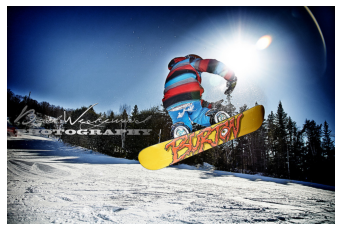

In [8]:
%time
from show_dataset import dataset_sample_example

print('\nFigure 4 - Coco Caption Dataset Sample.\n')

dataset_sample_example(
    images_path='/content/val2014',
    annotation_json='/content/annotations/captions_val2014.json'
)

The above image is a demonstration of the dataset. In other to use the dataset in our model we need to pre-process our images, generate a vocabulary of the words, tokenize this words, add special tokens ("<start>" and "<end>" tokens), and generate minibatches. In Torch these minibatches are generated by dataloader class. In this paper we used a 9956 words vocab and a batch size of 64. Also we limited training batches number and validation batches number due to problems with full memory.

In [9]:
from build_vocab import build_vocab
from image_tranform import transform_function
from data_loader import get_loader

vocab = build_vocab('/content/annotations/captions_train2014.json', 4)

loading annotations into memory...
Done (t=2.30s)
creating index...
index created!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[1000/414113] Tokenized the captions.
[2000/414113] Tokenized the captions.
[3000/414113] Tokenized the captions.
[4000/414113] Tokenized the captions.
[5000/414113] Tokenized the captions.
[6000/414113] Tokenized the captions.
[7000/414113] Tokenized the captions.
[8000/414113] Tokenized the captions.
[9000/414113] Tokenized the captions.
[10000/414113] Tokenized the captions.
[11000/414113] Tokenized the captions.
[12000/414113] Tokenized the captions.
[13000/414113] Tokenized the captions.
[14000/414113] Tokenized the captions.
[15000/414113] Tokenized the captions.
[16000/414113] Tokenized the captions.
[17000/414113] Tokenized the captions.
[18000/414113] Tokenized the captions.
[19000/414113] Tokenized the captions.
[20000/414113] Tokenized the captions.
[21000/414113] Tokenized the captions.
[

In [10]:
train_data = get_loader(
    root='train2014',
    json='annotations/captions_train2014.json',
    vocab=vocab,
    transform=transform_function(),
    batch_size=64,
    shuffle=True,
    num_workers=2
)

data = get_loader(
    root='val2014',
    json='annotations/captions_val2014.json',
    vocab=vocab,
    transform=transform_function(),
    batch_size=64,
    shuffle=False,
    num_workers=2
)

loading annotations into memory...
Done (t=0.56s)
creating index...
index created!
loading annotations into memory...
Done (t=0.31s)
creating index...
index created!


## Proposed Model
---
In this section we present our encoder-decoder model. The encoder is formed by the feature extraction of ResNet-101, while the decoder used the BERT to generate contextualized word vectors that are after detokenized and predicted captions are formed. These captions uses BERT embedding and images features together due to the attention mechanism module. This module is based in [Abdulrahman Jamjoom](<https://github.com/ajamjoom/Image-Captions>), [Yunjey Choi](<https://github.com/yunjey/pytorch-tutorial>), and [Sagar Vinodababu](<https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Image-Captioning>) implementations. Fig. 5 shows an summarizing schema of our model.

<center> Figure 5 - Proposed Encoder-Decoder Model. </center>

![show_and_tell_model](https://raw.githubusercontent.com/LuizPitaAlmeida/image_caption_generator/bf10721241fc4b9a6417444572c2730f15077016/figures/implemented_model.svg)

In next subsections we will discuss about the two parts of the model: encoder and decoder.



### Encoder: CNN Feature Extractor

We decided to use a common used CNN for image feature extraction, so we chosen the ResNet-101. This CNN receives as input a batch of images with dimension [3, 244, 244]. The first dimension is the number of channels in image, while the second and third ones are the number of rows and cols respectively. To only do a feature extraction, not a classification, we removed from ResNet101 its two final layers (classification layers). Also, we add at the end of the network an adaptative average pooling layer to make possible to chose the output image size. Since by default we chosen to use a output image size of 14x14, the average pooling does an upper-sampling over image size (ResNet101 last convolutional layer is 7x7). So the encoder output will have the shape [batch\_size, 14, 14, 2048] where 2048 is the embedding size of the last layer.

Let's import and print output shape of our encoder.


In [11]:
from encoder import Encoder

single_batch = next(iter(data))
images = single_batch[0].to(device)

encoder = Encoder()
encoder.to(device)
encoder_out = encoder(images)

print('Input Image Shape [batch_size, channels, rows, cols] =', images.shape)
print('Output Shape [batch_size, rows, cols, emb_dim] =', encoder_out.shape)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth



Input Image Shape [batch_size, channels, rows, cols] = torch.Size([64, 3, 224, 224])
Output Shape [batch_size, rows, cols, emb_dim] = torch.Size([64, 14, 14, 2048])


### Decoder: Association between Bert, LSTM, and Soft Attention

The decoder is formed by a LSTM layer to do captions predictions. The LSTM layer is feed by some image features and a set of word embedding provided by a BERT model acting over train dataset captions. Each predicted word feed a Soft Attention layers that applies weights for each pixel in image, saying to the model where to look. This weighted image embedding is the above-mentioned image feature that is inputted back into LSTM for next word prediction.

Notice that in our model both image and text pass by an attention mechanism process. The word deep representations are obtained from Bert while images deep representations are obtained from the encoder associated with an attention mechanism.

Decoder input is composed of the encoder output, the tokenized captions, and a list with the original length of each caption. We started generating word representations using Bert. For this, first we fix the captions' size using the length of the largest caption and padding the others until they have the same size as the largest. Then this captions are detokenized only to be tokenized by Bert tokenizer. This new tokens feed Bert model generating a embedding tensor. This tensor is transformed into a list with same size of the caption tokens, each element of this list is a portion of Bert embedding correspondent to each token of caption. The word embedding tensor is generated from this list.

After this, the second step is initialize LSTM layer, hidden states and cells with the mean value of encoder embedding. With this initial value, we can do the first pass over attention layer. The attention layer receives the encoder output and the hidden states of LSTM, and returns the alpha values, kind of probability or weight for each pixel in image, and the encoder output product with these alpha values. This product is concatenated with the Bert embedding feeding back the LSTM, that will update your hidden layers. This new hidden layers go to the attention mechanism, keeping this circle until the end of the caption. The complete output of LSTM pass throw a linear classification model, that predict the most probably words in the vocab to form the final caption. The decoder output is composed of the new captions predictions, the lists of captions tokens id in original tokenization, a list of length of each predicted caption and the alphas values used in image attention.

Let's start a decoder prediction for a single sample.

In [12]:
from decoder import Decoder

single_batch = next(iter(data))
caption_tokens = single_batch[1].to(device)
caption_lengths = single_batch[2]

decoder = Decoder(vocab=vocab, device=device)
decoder.to(device)
decoder_out = decoder(encoder_out, caption_tokens, caption_lengths)

print('Input Encoder Shape [batch_size, cols, rows, emb_dim] =',
      encoder_out.shape)
print('Input Captions Shape [batch_size, max_len_limit] =',
      caption_tokens.shape)
print('Input Caption length [batch_size] =', len(caption_lengths))

predictions, captions_id, decoded_lengths, alphas = decoder_out 
print('Output Predictions Shape [batch_size, max_len_limit, vocab_size] =',
      predictions.shape)
print('Output Captions id Shape [batch_size, max_len_limit+[CLS]] =',
      captions_id.shape)
print('Output Decoded lengths length [batch_size] =', len(decoded_lengths))
print('Output Alphas Shape [batch_size, max_len_limit, rows*cols] =',
      alphas.shape)


Input Encoder Shape [batch_size, cols, rows, emb_dim] = torch.Size([64, 14, 14, 2048])
Input Captions Shape [batch_size, max_len_limit] = torch.Size([64, 20])
Input Caption length [batch_size] = 64
Output Predictions Shape [batch_size, max_len_limit, vocab_size] = torch.Size([64, 19, 9956])
Output Captions id Shape [batch_size, max_len_limit+[CLS]] = torch.Size([64, 20])
Output Decoded lengths length [batch_size] = 64
Output Alphas Shape [batch_size, max_len_limit, rows*cols] = torch.Size([64, 19, 196])


## Results
---
In the output of encoder we had a set of score predictions, one for each word in vocabulary. To compute a readable output of these predictions it is necessary to pass these predictions in a softmax layer and get the words ids with highest probability to form a new caption.

Also we evaluate our results using BLEU metric. This is a common metric used in machine translation problems, that compares a sentence generated by a machine (hypotheses) with humans annotations for that sentence (references). The BLEU metric is the metric used for the COCO Captions Challenger where we got our database. Also this metric has some weighting variations that consider the appearance of different n-grams in common with the reference (BLEU-1, BLEU-2, BLEU-3, and BLEU-4)


Download trained model from FigShare.

Figshare File: [link](<https://ndownloader.figshare.com/files/23582399>)

In [13]:
!wget -nc --progress=dot:giga 'https://ndownloader.figshare.com/files/23582399' \
    -O '/content/image_caption_check.ckpt'

--2020-07-01 23:04:09--  https://ndownloader.figshare.com/files/23582399
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 34.246.9.175, 34.255.47.165, 52.212.14.112, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|34.246.9.175|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/23582399/image_caption_check.ckpt [following]
--2020-07-01 23:04:09--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/23582399/image_caption_check.ckpt
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.100.115
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.100.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 805198753 (768M) [application/octet-stream]
Saving to: ‘/content/image_caption_check.ckpt’

     0K ........ ........ ........ ........  4% 74.5M 10s
 32768K ........ ........ ........ ........  8%  137

In [14]:
from pipelines.test import TestPrediction
ckpt = '/content/image_caption_check.ckpt'
test_handler = TestPrediction(train_data, data, vocab, ckpt)

### Qualitative Results

Let's first analyse the qualitative results. The Fig.6 shows a predicted new caption hypotheses in comparison with a reference caption and its image.

You can change SAMPLE_ID from 0 to 63 in order to see other results.


Figure 6 - Single Sample Predicted Result.

Hypotheses: a old car car car car in the street .
References: an old teal colored car parked on the street .


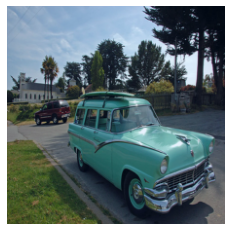

In [17]:
SAMPLE_ID = 34

from print_results import compute_sample_results, print_sample

model_out = test_handler.predict_in_single_batch(single_batch=single_batch)

hypotheses, references, images, alphas = compute_sample_results(
    batch_sample=single_batch,
    decoder_out = model_out
)

print('\nFigure 6 - Single Sample Predicted Result.\n')

print_sample(
    vocab=vocab,
    hypotheses=hypotheses,
    references=references,
    images=images,
    sample_id=SAMPLE_ID,
    alphas=alphas,
    show_att=False
)

We notice that the result obtained in hypothesis is very similar to the reference sentence. However, our prediction has less details and repeated some words. This is caused because we interrupted out training in epoch 39. Also, we limited our train dataset, because lack of memory issues. We can also look to alphas variable and try to plot the attention mechanism effect, as shown in Fig.7.


Figure 7 - Effect of Soft Attention over a sample result.

Hypotheses: a old car car car car in the street .
References: an old teal colored car parked on the street .


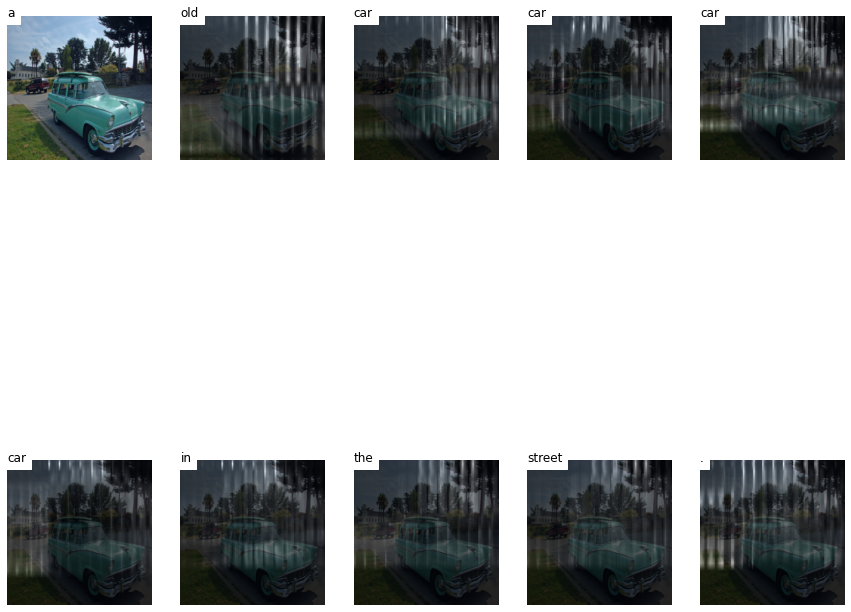

In [18]:
print('\nFigure 7 - Effect of Soft Attention over a sample result.\n')

print_sample(
    vocab=vocab,
    hypotheses=hypotheses,
    references=references,
    images=images,
    sample_id=SAMPLE_ID,
    alphas=alphas,
    show_att=True
)

We can notice that the attention alpha values are starting to split relevant portions of the image. Pay attention in "parked" word, and notice how the attention mask excludes the car to generate this word. With more training this results starts to become more visible.


### Quantitative Results

We calculated BLEU metrics over all validation dataset.

In [20]:
test_handler.notebook_test()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 2 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Validation loss: tensor(2.4603, device='cuda:0')
BLEU: 0.3485908750397418
BLEU-1: 0.6694201343388213
BLEU-2: 0.4237700983272757
BLEU-3: 0.27755544076918504
BLEU-4: 0.1875362524921306
--------------------------------------------------------------------------------
TEST RESULTS
{'bleu': 0.3485908750397418,
 'bleu_1': 0.6694201343388213,
 'bleu_2': 0.4237700983272757,
 'bleu_3': 0.27755544076918504,
 'bleu_4': 0.1875362524921306,
 'val_loss': tensor(2.4603, device='cuda:0')}
--------------------------------------------------------------------------------



The results are presented in Table 1.

| Model         | Val (loss) | BLEU-1 | BLEU-2 | BLEU-3 | BLEU-4 |
|---------------|------------|--------|--------|--------|--------|
| JAMJOOM MODEL | 1.901      | 78.27  | 59.53  | 46.22  | 36.53  |
| OUR MODEL     | 2.460      | 66.94  | 42.37  | 27.74  | 18.73  |

<center>Table 1 - Model validation loss and BLEU scores on the validation dataset</center>

From the Table, we can see that all of our results are below JamJoom implementation. This confirm the fact that we stopped in the middle of the train.

## Conclusions
---
Build a model for image captioning is not easy. Many modules are necessary: image encoder, word embedding generator, attention mechanism, text generator. Connect this model and fine-tuning each model together is a challenger.

Our results showed that we still have space to improve. For this is necessary to continue the training until archive the best results.

In future works, i will develop an inference model to make new images predictions. And try to developed approach that does not need a reference caption as input. Another desire goal is to remove the LSTM layer and use only a Transformer layer.

## References
---

\[1\] Vinyals, Oriol, et al. "Show and tell: A neural image caption generator." *Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition*. 2015.

\[2\] Hossain, MD Zakir, et al. "A comprehensive survey of deep learning for image captioning." *ACM Computing Surveys (CSUR)* 51.6 (2019): 1-36.

\[3\] Vaswani, Ashish, et al. "Attention is all you need. 2017." *arXiv preprint arXiv:1706.03762* 10 (2017).

\[4\] Devlin, Jacob, et al. "Bert: Pre-training of deep bidirectional transformers for language understanding." *arXiv preprint arXiv:1810.04805* (2018).

\[5\] Raffel, Colin, et al. "Exploring the limits of transfer learning with a unified text-to-text transformer." *arXiv preprint arXiv:1910.10683* (2019).

\[6\] Xu, Kelvin, et al. "Show, attend and tell: Neural image caption generation with visual attention." *International Conference on Machine Learning*. 2015.

\[7\] Li, Gen, et al. "Unicoder-vl: A universal encoder for vision and language by cross-modal pre-training." *arXiv preprint arXiv:1908.06066* (2019).

\[8\] Herdade, Simao, et al. "Image Captioning: Transforming Objects into Words." *Advances in Neural Information Processing Systems*. 2019.

\[9\] Su, Weijie, et al. "Vl-bert: Pre-training of generic visual-linguistic representations." *arXiv preprint arXiv:1908.08530* (2019).

\[10\] Li, Liunian Harold, et al. "Visualbert: A simple and performant baseline for vision and language." *arXiv preprint arXiv:1908.03557* (2019).

\[11\] Lu, Jiasen, et al. "Vilbert: Pretraining task-agnostic visiolinguistic representations for vision-and-language tasks." *Advances in Neural Information Processing Systems*. 2019.

\[12\] Lin, Tsung-Yi, et al. "Microsoft coco: Common objects in context." European conference on computer vision. Springer, Cham, 2014.